# Introducción

**Nombre: Christian Camilo Urcuqui López**

En el presente notebook se desarrolla el reto propuesto por LATAM Airlines, el recurso se componente de las siguientes unidades:

+ [Descripcion del reto y datos](#Descripcion-del-reto-y-datos)
+ [Exploracion](#Exploracion)
    - Respuesta a preguntas
+ Modelamiento
+ Resultados
+ Conclusiones
+ Trabajo futuro

# Descripcion del reto y datos

El problema consiste en predecir la probabilidad de **atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL)**. Para eso les entregamos un dataset usando datos públicos y reales donde **cada fila corresponde a un vuelo que aterrizó o despegó de SCL**. Para cada vuelo se cuenta con la siguiente información:

1. Fecha-I : Fecha y hora programada del vuelo.
2. Vlo-I : Número de vuelo programado.
3. Ori-I : Código de ciudad de origen programado.
4. Des-I : Código de ciudad de destino programado.
5. Emp-I : Código aerolínea de vuelo programado.
6. Fecha-O : Fecha y hora de operación del vuelo.
7. Vlo-O : Número de vuelo de operación del vuelo.
8. Ori-O : Código de ciudad de origen de operación
9. Des-O : Código de ciudad de destino de operación.
10. Emp-O : Código aerolínea de vuelo operado.
11. DIA : Día del mes de operación del vuelo.
12. MES : Número de mes de operación del vuelo.
13. AÑO : Año de operación del vuelo.
14. DIANOM : Día de la semana de operación del vuelo.
15. TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
16. OPERA : Nombre de aerolínea que opera.
17. SIGLAORI : Nombre ciudad origen.
18. SIGLADES : Nombre ciudad destino.

***
**Notas**

El diccionario presenta una cantidad de 18 variables, el cual no explica en detalle rangos, formato, tipos y definición de valores que puedan servir para encontrar errores para corrección.

# Análisis exploratorio

## librerias

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de información

In [5]:
df = pd.read_csv("datasets/dataset_SCL.csv")

C:\Users\Usuario\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploracion

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


En principio cargado dice que no presenta NaN, sin embargo sería bueno luego indagar ya que hay datos cargados como tipo object

In [6]:
df.head(3)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami


Contamos con una cantidad de 68206 registros por 18 variables (mencionadas en el diccionario de variables)

### transformación

1. Se procederá a cambiar las variables a su debido tipo, por ejemplo la de fecha a datetime en pandas

In [8]:
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])

2. Voy a cambiar el nombre de las columnas para mayor comodidad durante el desarrollo del trabajo

In [15]:
df.columns = df.columns.str.replace("-","_")

In [46]:
df.Vlo_I.unique()

array(['226', '912', '940', '92', '93', '401', '11', '1011', '1281',
       '1283', '1285', '1287', '1289', '1291', '2291', '98', '116', '176',
       '240', '295', '689', '250', '112', '118', '174', '249', '276',
       '495', '4495', '146', '7661', '7663', '9245', '9268', '9362',
       '6830', '702', '624', '28', '846', '709', '741', '8021', '8023',
       '8027', '8029', '8069', '8073', '8075', '8099', '8125', '8137',
       '8160', '8161', '9601', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '1', '3', '7', '9', '13', '15', '17', '21', '23',
       '25', '41', '43', '51', '53', '55', '61', '71', '73', '75', '81',
       '83', '102', '104', '106', '108', '110', '120', '122', '128',
       '130', '132', '134', '140', '142', '150', '156', '160', '162',
       '164', '166', '170', '172', '180', '182', '184', '186', '188',
       '190', '192', '194', '196', '501', '503', '507', '521', '531',
       '551', '800', '802', '804', '1083', '14', '31', '35', '37', '57',
     

La variable de número de vuelo ha sido cargado como object y debería ser númerico, revisando el archivo no parece presentar problemas en los datos, sin embargo, al momento del cargue se presentan algunos valores con ''. 

In [49]:
pd.to_numeric(df.Vlo_I)

ValueError: Unable to parse string "989P" at position 22232

In [52]:
pd.to_numeric(df.Vlo_I.str.replace("P",""))

ValueError: Unable to parse string "846A" at position 39266

El anterior error nos permite determinar que si hay problemas de digitación en la variable

In [70]:
df[df.Vlo_I.isin(["989P","846A", "940P", "591P", "1104A"])]

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
22232,2017-05-13 21:50:00,989P,SCEL,SUMU,AAL,2017-05-13 21:52:00,989,SCEL,SUMU,AAL,13,5,2017,Sabado,I,American Airlines,Santiago,Montevideo
27464,2017-06-16 20:30:00,940P,SCEL,KDFW,AAL,2017-06-16 20:50:00,940,SCEL,KDFW,AAL,16,6,2017,Viernes,I,American Airlines,Santiago,Dallas
39225,2017-08-07 19:00:00,591P,SCEL,LFPG,PUE,2017-08-07 20:35:00,591P,SCEL,LFPG,PUE,7,8,2017,Lunes,I,Plus Ultra Lineas Aereas,Santiago,Paris
39266,2017-08-24 23:00:00,846A,SCEL,KIAH,UAL,2017-08-24 23:00:00,2804,SCEL,KIAH,UAL,24,8,2017,Jueves,I,United Airlines,Santiago,Houston
58126,2017-11-05 17:00:00,1104A,SCEL,SCSE,SKU,2017-11-05 17:42:00,1104,SCEL,SCSE,SKU,5,11,2017,Domingo,N,Sky Airline,Santiago,La Serena


Hay 5 registros con errores de digitación 

## Conclusiones 

+ EL dataset cuenta errores de digitación en `Vlo-I` 

### Respuesta a preguntas 

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [17]:
print("fecha minima {} y fecha maxima {}".format(df["Fecha_I"].min(),df["Fecha_I"].max()))

fecha minima 2017-01-01 00:15:00 y fecha maxima 2017-12-31 23:55:00


In [16]:
print("fecha minima {} y fecha maxima {}".format(df["Fecha_O"].min(),df["Fecha_O"].max()))

fecha minima 2017-01-01 00:04:00 y fecha maxima 2018-01-01 00:12:00


Hubieron vuelos programados durante 2017 y la última operación se realizo el primero de enero de 2018.

In [18]:
df.Ori_I.value_counts()

SCEL    68206
Name: Ori_I, dtype: int64

In [21]:
len(df.Des_I.unique())

64

<AxesSubplot:xlabel='Des_I', ylabel='count'>

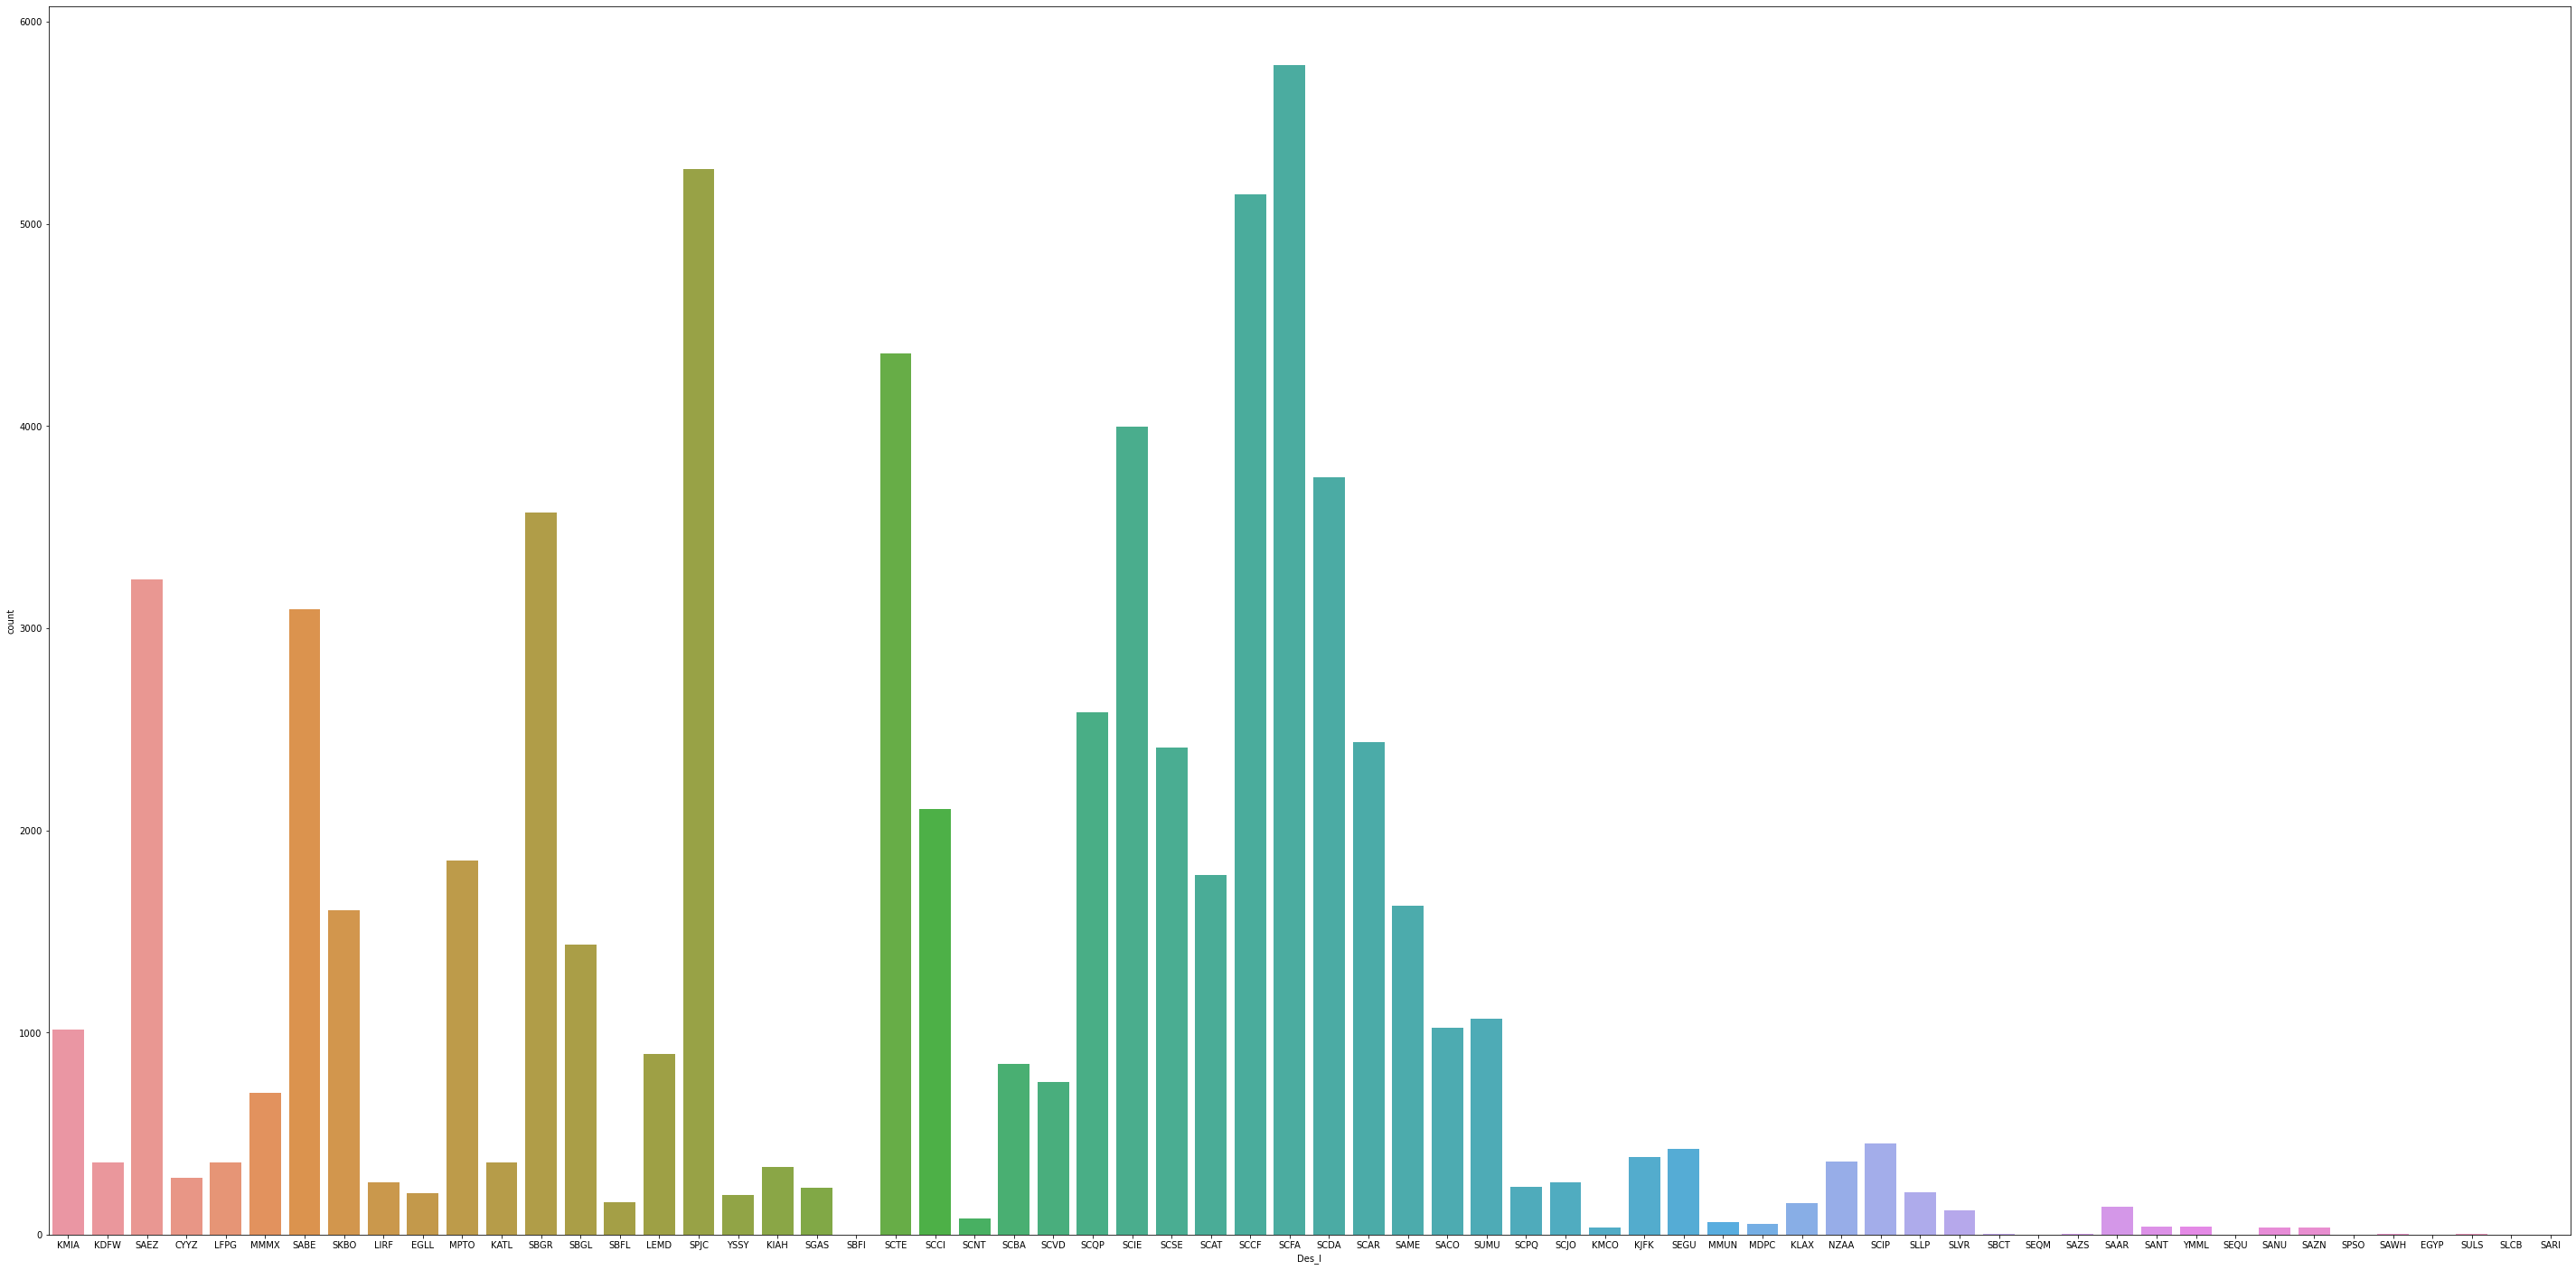

In [31]:
plt.figure(figsize=(50,25))
sns.countplot(x=df.Des_I)

Solo hubo un origen programado de ciudad, de acuerdo con Internet el código SCEL pertenece al aeropuerto [Arturo Merino Benítez International Airport](https://airportcodes.aero/scel). En total hubieron 64 ciudad destino programadas, algunos con bastantes registros y otros no tanto. 

Entre los más visitados se encuentran los siguientes destinos nacionales y uno internacional:
+ SCFA: Cerro Moreno International Airport (Chile)
+ SPJC: Jorge Chávez International Airport (Perú)
+ SCCF: El Loa Airport (Chile)
+ SCTE: El Tepual Airport (Chile)



In [35]:
df.Des_I.value_counts()[:30]

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
SCDA    3747
SBGR    3570
SAEZ    3240
SABE    3094
SCQP    2583
SCAR    2436
SCSE    2410
SCCI    2105
MPTO    1850
SCAT    1780
SAME    1625
SKBO    1604
SBGL    1434
SUMU    1066
SACO    1023
KMIA    1015
LEMD     894
SCBA     843
SCVD     753
MMMX     700
SCIP     452
SEGU     423
KJFK     383
NZAA     361
LFPG     359
Name: Des_I, dtype: int64

In [37]:
df.Des_I.value_counts()[-30:]

LIRF    259
SCJO    259
SCPQ    235
SGAS    232
SLLP    209
EGLL    205
YSSY    195
SBFL    162
KLAX    155
SAAR    136
SLVR    120
SCNT     79
MMUN     63
MDPC     54
YMML     38
SANT     38
SAZN     37
SANU     35
KMCO     34
SULS      6
SAWH      6
SBCT      3
SAZS      2
SLCB      1
SPSO      1
SEQM      1
EGYP      1
SBFI      1
SARI      1
SEQU      1
Name: Des_I, dtype: int64

In [39]:
df.Emp_I.value_counts()[:]

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp_I, dtype: int64

In [40]:
df.Emp_I.value_counts(normalize=True)

LAN    0.551432
SKU    0.209630
TAM    0.044703
ARG    0.028575
CMP    0.027124
LAW    0.023077
AVA    0.016890
JAT    0.016054
GLO    0.011817
AAL    0.011099
ACA    0.008284
IBE    0.005307
AFR    0.005249
DAL    0.005249
AMX    0.005146
UAL    0.004912
ONE    0.004091
AZA    0.003797
KLM    0.003680
LAP    0.003167
BAW    0.003006
QFU    0.002859
JMR    0.001466
LRC    0.001349
AUT    0.001085
PUE    0.000718
LXP    0.000132
LPE    0.000059
DSM    0.000029
LNE    0.000015
Name: Emp_I, dtype: float64

La aerolineas que más presentan vuelos son LAN (55%) y SKU (22%).

In [80]:
df[df.Vlo_I.isin(["989P","846A", "940P", "591P", "1104A"])==False].Vlo_I.astype(int).value_counts()

174     686
11      645
116     608
150     557
704     556
       ... 
1334      1
1142      1
1502      1
1301      1
9851      1
Name: Vlo_I, Length: 579, dtype: int64

Respecto a los números de los vuelos programados hay algunos con varias repeticiones y otros con pocas.

In [81]:
df.Ori_O.value_counts()

SCEL    68206
Name: Ori_O, dtype: int64

In [83]:
len(df.Des_O.unique())

63

Hay una ciudad de destino operación que no aparece en el conjunto de códigos destinos programados

Respuesta: KIAD

In [84]:
set(df.Des_O.unique()) - set(df.Des_I.unique()) 

{'KIAD'}

In [85]:
set(df.Des_I.unique()) -set(df.Des_O.unique())

{'SARI', 'SEQU'}

Hay códigos de ciudad destino programados que no aparecen en los códigos de ciudad destino de operación.


Respuesta: SARI, SEQU

In [86]:
df.Des_O.value_counts()

SCFA    5786
SPJC    5270
SCCF    5146
SCTE    4357
SCIE    3993
        ... 
SEQM       2
KIAD       1
EGYP       1
SPSO       1
SLCB       1
Name: Des_O, Length: 63, dtype: int64

Entre los más visitados a nivel de operación se encuentran los siguientes destinos nacionales y uno internacional:

+ SCFA: Cerro Moreno International Airport (Chile)
+ SPJC: Jorge Chávez International Airport (Perú)
+ SCCF: El Loa Airport (Chile)
+ SCTE: El Tepual Airport (Chile)

In [87]:
df.Emp_O.value_counts(normalize=True)

LAN    0.307715
LXP    0.213442
SKU    0.209630
TAM    0.044659
ARG    0.028531
CMP    0.027124
JMR    0.024147
LPE    0.017799
JAT    0.016054
AVA    0.012975
GLO    0.011817
AAL    0.011099
ACA    0.008284
DSM    0.007228
LNE    0.005483
IBE    0.005307
AFR    0.005249
DAL    0.005249
LRC    0.005234
AMX    0.005146
UAL    0.004912
ONE    0.004091
AZA    0.003797
KLM    0.003680
LAP    0.003211
BAW    0.003006
QFA    0.002859
AUT    0.001129
PUE    0.000718
56R    0.000249
48O    0.000147
TPU    0.000029
Name: Emp_O, dtype: float64

La aerolineas que más presentan vuelos a nivel de operación son LAN (30%) y LXP (21%), lo anterior contrarresta contra los valores a nivel de programación.